In [71]:
from mysql.connector import connect
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns#
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
password = getpass.getpass()

 ········


In [ ]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
df = '''SELECT 
    fm.film_id ,
    fm.title,
    rt.rental_date ,
    rt.rental_id,
    i.store_id,
    fm.rating ,
    fm.rental_duration 
FROM
    sakila.film fm
JOIN
    inventory i ON fm.film_id = i.film_id
JOIN
    rental rt ON rt.inventory_id = i.inventory_id
;'''

In [ ]:
data = pd.read_sql_query(df, engine)
data

In [ ]:
data.head()

In [33]:
data.shape

(16045, 9)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16045 entries, 0 to 16044
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   film_id             16045 non-null  int64         
 1   title               16045 non-null  object        
 2   rental_date         16045 non-null  datetime64[ns]
 3   rental_id           16045 non-null  int64         
 4   store_id            16045 non-null  int64         
 5   rating              16045 non-null  object        
 6   rental_duration     16045 non-null  int64         
 7   last_month          16045 non-null  bool          
 8   rented_last_2month  16045 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(4), object(2)
memory usage: 908.9+ KB


In [35]:
data.describe()

,film_id,rental_date,rental_id,store_id,rental_duration
count,16045.000000,16045,16045.000000,16045.000000,16045.000000
mean,501.077719,2005-07-23 18:23:43.965098240,8025.871611,1.506139,4.935556
min,1.000000,2005-05-24 22:53:30,1.000000,1.000000,3.000000
25%,255.000000,2005-07-07 00:58:54,4014.000000,1.000000,4.000000
50%,496.000000,2005-07-28 16:05:38,8026.000000,2.000000,5.000000
75%,753.000000,2005-08-17 21:24:47,12038.000000,2.000000,6.000000
max,1000.000000,2024-03-11 14:33:38,16050.000000,2.000000,7.000000
std,288.531551,NaN,4633.066013,0.499978,1.401671


In [36]:
data.isna().sum()

film_id               0
title                 0
rental_date           0
rental_id             0
store_id              0
rating                0
rental_duration       0
last_month            0
rented_last_2month    0
dtype: int64

<Axes: xlabel='rental_duration', ylabel='count'>

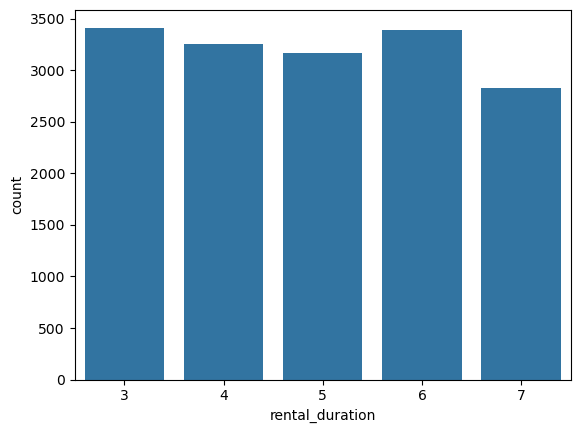

In [37]:
sns.countplot(x="rental_duration",data=data)

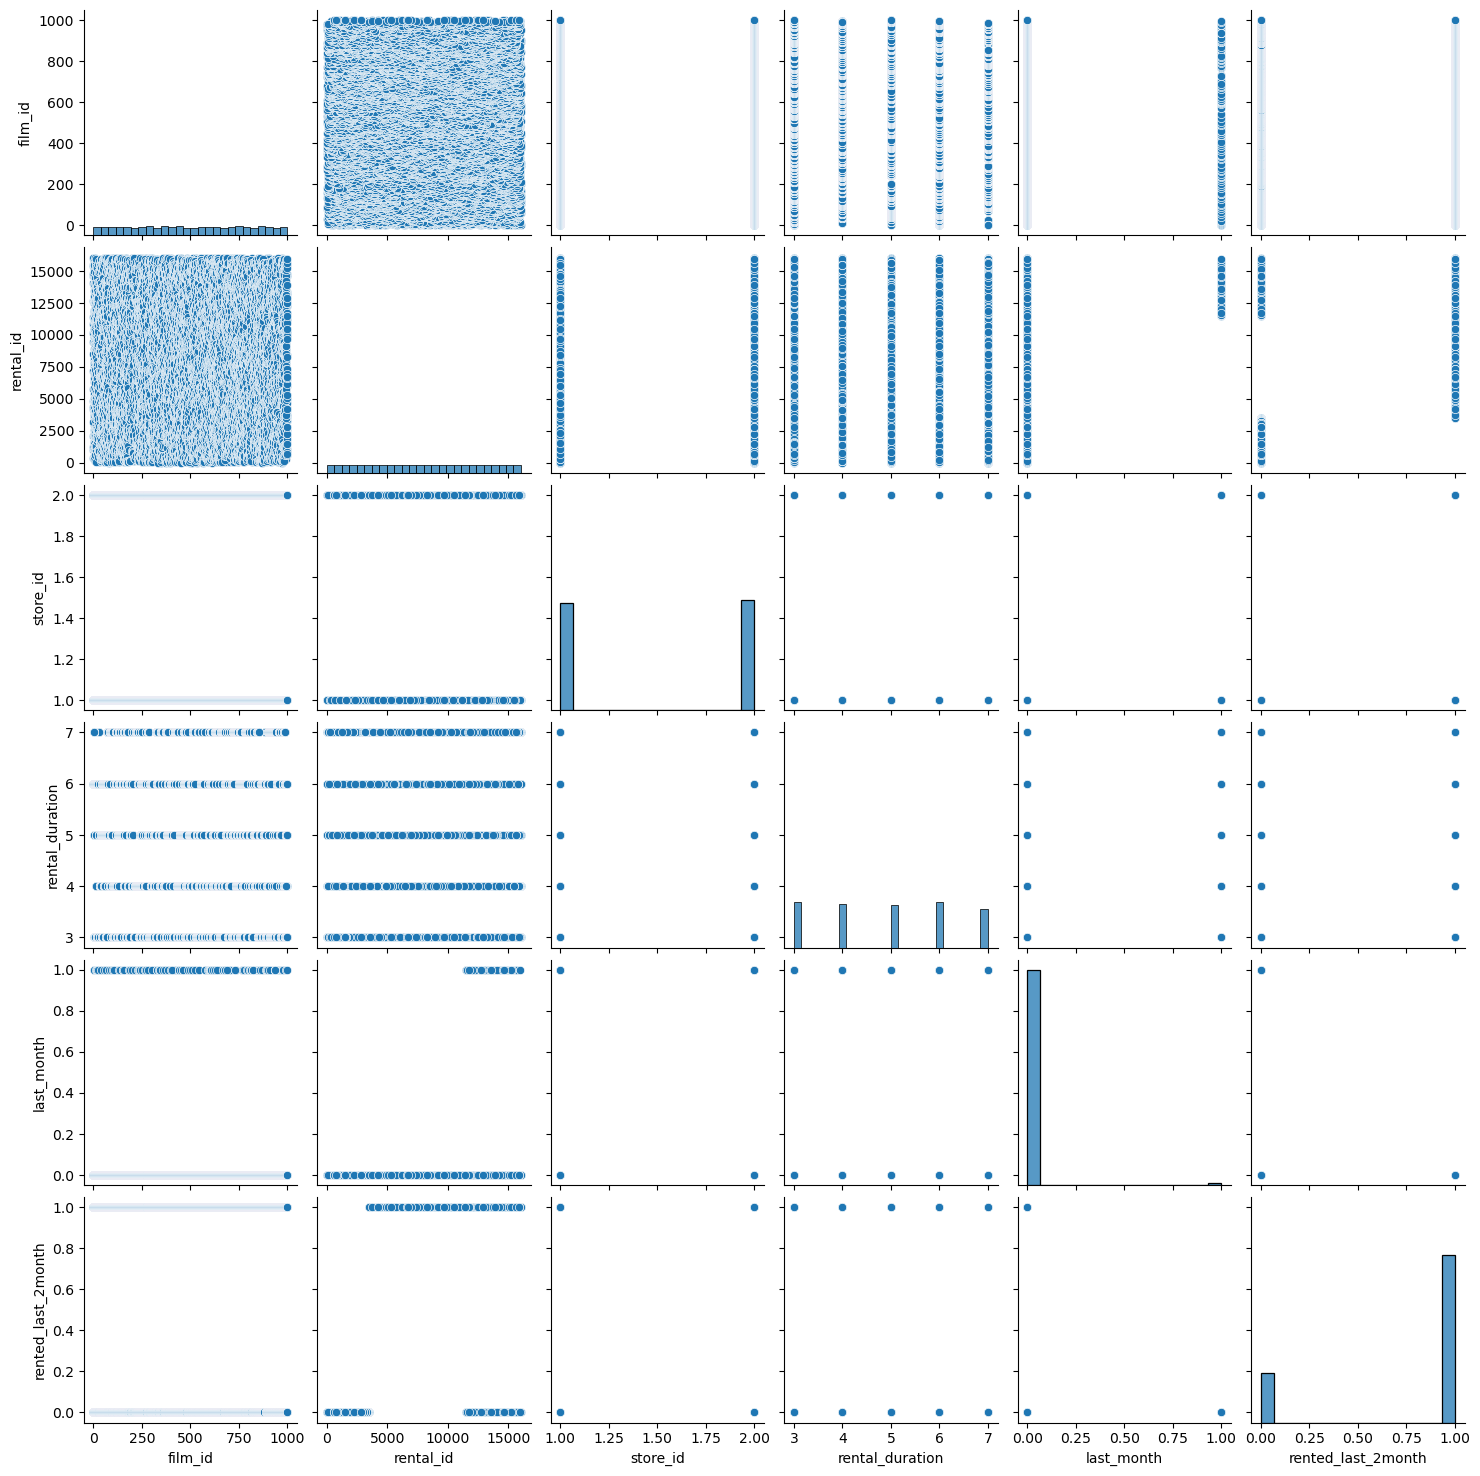

In [38]:
sns.pairplot(data)

In [39]:
#data.rental_date = data.rental_date.apply(lambda x: 1 if x=='2005-08' else 0)

In [40]:
#data.rental_duration.value_counts(normalize=True)

In [41]:
#data.rental_date.value_counts()

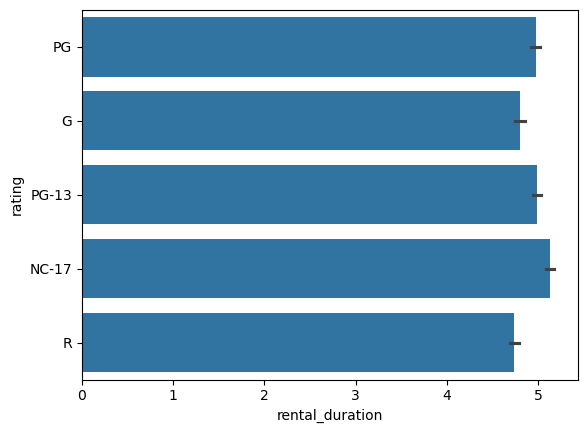

In [42]:
sns.barplot(x='rental_duration', y='rating', data=data)
plt.show()

In [43]:
data.columns

Index(['film_id', 'title', 'rental_date', 'rental_id', 'store_id', 'rating',
       'rental_duration', 'last_month', 'rented_last_2month'],
      dtype='object')

In [44]:
data['rental_id'].value_counts()

rental_id
4863     1
12797    1
2054     1
4138     1
9649     1
        ..
9912     1
14486    1
10319    1
13427    1
12894    1
Name: count, Length: 16045, dtype: int64

In [45]:
data['rental_date'] = pd.to_datetime(data['rental_date'])


In [46]:
data['last_month'] = (data['rental_date'].dt.month == (pd.to_datetime('today') - pd.DateOffset(months=1)).month)

In [47]:
data

,film_id,title,rental_date,rental_id,store_id,rating,rental_duration,last_month,rented_last_2month
0,1,ACADEMY DINOSAUR,2005-07-08 19:03:15,4863,1,PG,6,False,True
1,1,ACADEMY DINOSAUR,2005-08-02 20:13:10,11433,1,PG,6,False,True
2,1,ACADEMY DINOSAUR,2005-08-21 21:27:43,14714,1,PG,6,False,True
3,1,ACADEMY DINOSAUR,2005-05-30 20:21:07,972,1,PG,6,False,False
4,1,ACADEMY DINOSAUR,2005-06-17 20:24:00,2117,1,PG,6,False,False
...,...,...,...,...,...,...,...,...,...
16040,1000,ZORRO ARK,2005-05-29 03:49:03,711,2,NC-17,3,False,False
16041,1000,ZORRO ARK,2005-06-15 21:50:32,1493,2,NC-17,3,False,False
16042,1000,ZORRO ARK,2005-07-12 13:24:47,6712,2,NC-17,3,False,True
16043,1000,ZORRO ARK,2005-07-31 07:32:21,9701,2,NC-17,3,False,True


In [60]:
data['last_month'].value_counts()

last_month
False    15863
True       182
Name: count, dtype: int64

In [48]:
numerical= data.select_dtypes(include='number')
numerical

,film_id,rental_id,store_id,rental_duration
0,1,4863,1,6
1,1,11433,1,6
2,1,14714,1,6
3,1,972,1,6
4,1,2117,1,6
...,...,...,...,...
16040,1000,711,2,3
16041,1000,1493,2,3
16042,1000,6712,2,3
16043,1000,9701,2,3


In [49]:
numerical.corr()

,film_id,rental_id,store_id,rental_duration
film_id,1.000000,0.000202,-0.005861,-0.054767
rental_id,0.000202,1.000000,-0.006191,-0.006145
store_id,-0.005861,-0.006191,1.000000,0.012482
rental_duration,-0.054767,-0.006145,0.012482,1.000000


<Axes: >

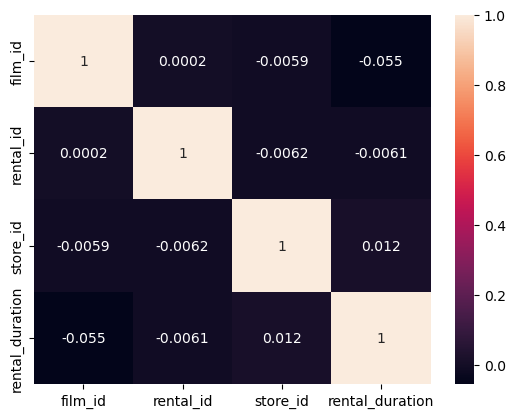

In [50]:
sns.heatmap(numerical.corr(), annot=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16045 entries, 0 to 16044
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   film_id             16045 non-null  int64         
 1   title               16045 non-null  object        
 2   rental_date         16045 non-null  datetime64[ns]
 3   rental_id           16045 non-null  int64         
 4   store_id            16045 non-null  int64         
 5   rating              16045 non-null  object        
 6   rental_duration     16045 non-null  int64         
 7   last_month          16045 non-null  bool          
 8   rented_last_2month  16045 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(4), object(2)
memory usage: 908.9+ KB


In [52]:
#X = df[['film_id', 'rental_id', 'rental_duration']]
#y = df['last_month']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
#data= data.drop("rating", axis= 1)

In [54]:
#data.title.value_counts()

In [55]:
#data= data.drop("rating", axis= 1)

In [56]:

#X = data[['rental_id', 'rental_duration', 'rating']]
#y= data['last_month']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = LogisticRegression()
#model.fit(X_train, y_train)

In [62]:

X = data[['film_id', 'rental_id', 'rental_duration']]
y = data['last_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


In [72]:

X = data[['film_id', 'rental_id', 'rental_duration']]
y = data['last_month']

pipeline = make_pipeline(
    StandardScaler(),  
    SMOTE(random_state=42),  
    LogisticRegression() 
)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.74


In [73]:

X = data[['film_id', 'rental_id', 'rental_duration']]
y = data['last_month']

pipeline = make_pipeline(
    StandardScaler(),  
    SMOTE(random_state=42), 
    LogisticRegression()  
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.74


In [74]:

model = LogisticRegression()

cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')


Cross-Validation Scores: [0.83651763 0.8467599  0.84535067 0.84535067 0.84850276]
Mean Cross-Validation Accuracy: 0.8444963247625651
